# Unsupervised Machine Learning - Clustering, Part 1

## This script contains the following points:
### 01. Importing libraries
### 02. Importing Data
### 03. Data prep for the analysis
#### - Standardize the data
### 04. The Elbow Technique
### 05. K-Means Clustering
#### - Assign clusters to the original data
#### - Visualizations using the clustered data
#### - Descriptive Statistics for the Clusters

## 01. Importing libraries

In [189]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [190]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Importing Data

In [191]:
# Define path
path = r'C:\Users\Sanja\Documents\11-2023 Water Loss Project'

In [192]:
#Import dataset
df_pipelines_failure = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'pipes_failures_final.xlsx'), index_col = False)

In [193]:
df_pipelines_failure.columns

Index(['Unnamed: 0', 'pipe_age_2013', 'length', 'diameter', 'material',
       'soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load',
       'stray_electricity', 'cause_of_damage', 'failure_occurred_on_pipe'],
      dtype='object')

In [194]:
df_pipelines_failure.head(5)

,Unnamed: 0,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,cause_of_damage,failure_occurred_on_pipe
0,0,NaN,0.177445,600.0,4,4,3,1.0,1,4,NaN,0
1,1,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0
2,2,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0
3,3,NaN,0.185747,600.0,4,4,3,1.0,1,4,NaN,0
4,4,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0


## 03. Data prep for the analysis for K-Means Algorithm

#### Note: K-Means Algorithm can only handle numerical variables, so I’ll need to remove The categorical columns from the data. This implies that only the following columns will be retained: 'pipe_age_2013', 'length', 'diameter', and 'failure_occurred_on_pipe'.

In [195]:
selected_columns = ['pipe_age_2013', 'length', 'diameter', 'failure_occurred_on_pipe']

In [196]:
df_numerical = df_pipelines_failure[selected_columns]

In [197]:
df_numerical.head()

,pipe_age_2013,length,diameter,failure_occurred_on_pipe
0,NaN,0.177445,600.0,0
1,NaN,0.143000,600.0,0
2,NaN,0.143000,600.0,0
3,NaN,0.185747,600.0,0
4,NaN,0.143000,600.0,0


In [198]:
df_numerical.shape

(79346, 4)

In [199]:
# Missing values
df_numerical.isnull().sum()

pipe_age_2013               5493
length                         0
diameter                     142
failure_occurred_on_pipe       0
dtype: int64

In [200]:
# Drop rows with missing values
df_numerical_no_nan = df_numerical.dropna()

# Display the resulting DataFrame
print(df_numerical_no_nan)

       pipe_age_2013     length  diameter  failure_occurred_on_pipe
12              36.0   0.850000     500.0                         0
14               9.0   2.503001     500.0                         0
15              36.0   5.169915     500.0                         0
16              24.0  64.949526     500.0                         0
17              50.0  10.940000     500.0                         0
...              ...        ...       ...                       ...
79199            3.0   1.600000      25.0                         0
79200            2.0   6.342000      25.0                         0
79201            7.0   0.286000      25.0                         0
79202            1.0   4.328000      25.0                         0
79203            1.0   4.938000      25.0                         0

[73712 rows x 4 columns]


In [201]:
df_numerical_no_nan.shape

(73712, 4)

In [202]:
# Standardize the data
df_numerical_scaler = StandardScaler().fit_transform(df_numerical_no_nan)

In [203]:
df_numerical_scaler

array([[ 0.30610695, -0.3491876 ,  6.02964393, -0.17195669],
       [-1.07665185, -0.2862935 ,  6.02964393, -0.17195669],
       [ 0.30610695, -0.18482156,  6.02964393, -0.17195669],
       ...,
       [-1.17907843, -0.37064692, -0.9798436 , -0.17195669],
       [-1.48635817, -0.21685513, -0.9798436 , -0.17195669],
       [-1.48635817, -0.19364558, -0.9798436 , -0.17195669]])

## 04. The Elbow Technique

In [204]:
print(type(df_numerical_scaler))
print(df_numerical_scaler.shape)

<class 'numpy.ndarray'>
(73712, 4)


#### Observation: df_numerical_scaler is a NumPy array with the shape (73712, 4), which means it has 73712 rows and 4 columns. This is a 2D array, and I can use it directly with the KMeans algorithm.

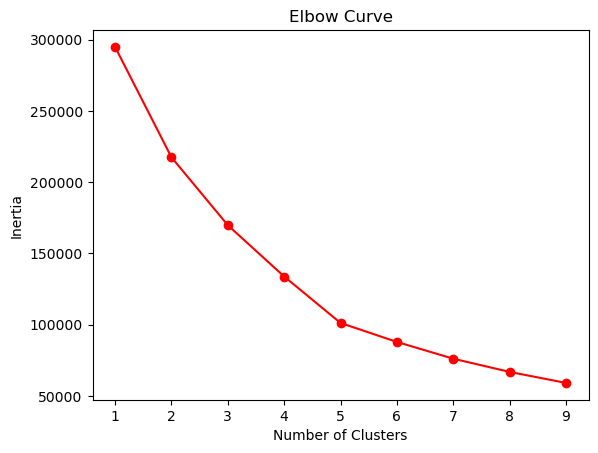

In [205]:
# Define the range of potential clusters in the data
k_values = range(1, 10)

# Initialize an empty list to store the inertia for each k
inertia_values = []

# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(df_numerical_scaler)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Observation:   In this instance, the optimal number of clusters appears to be five. This conclusion is drawn from the noticeable increase in inertia from one to five on the x-axis. Beyond this point, the curve levels off, indicating diminishing returns in terms of variance reduction with additional clusters.

## 05. K-Means Clustering (can handle only numerical variables)

In [206]:
# Create the k-means object.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

In [207]:
# Fit the k-means object to the data.

kmeans.fit(df_numerical_scaler)

KMeans(n_clusters=5, n_init=10, random_state=42)

#### Attach a new column and create a new dataframe 'df_with_clusters' with the resulting clusters, that  allows  creating a visualization using the clusters

In [208]:
# Convert the cluster labels into a DataFrame
cluster_labels = kmeans.fit_predict(df_numerical_scaler)
cluster_df = pd.DataFrame(cluster_labels, columns=['clusters'])
# Concatenate the cluster labels with your original data
df_with_clusters = pd.concat([pd.DataFrame(df_numerical_scaler), cluster_df], axis=1)

In [209]:
df_with_clusters.head()

,0,1,2,3,clusters
0,0.306107,-0.349188,6.029644,-0.171957,0
1,-1.076652,-0.286294,6.029644,-0.171957,0
2,0.306107,-0.184822,6.029644,-0.171957,0
3,-0.308453,2.089699,6.029644,-0.171957,0
4,1.023093,0.034721,6.029644,-0.171957,0


In [210]:
# Get back the original columns names
df_with_clusters.columns = df_numerical.columns.tolist() + ['clusters']

# Display the head of the DataFrame
print(df_with_clusters.head())

   pipe_age_2013    length  diameter  failure_occurred_on_pipe  clusters
0       0.306107 -0.349188  6.029644                 -0.171957         0
1      -1.076652 -0.286294  6.029644                 -0.171957         0
2       0.306107 -0.184822  6.029644                 -0.171957         0
3      -0.308453  2.089699  6.029644                 -0.171957         0
4       1.023093  0.034721  6.029644                 -0.171957         0


In [211]:
df_with_clusters['clusters'].value_counts()

3    31673
4    26443
0    13391
1     2097
2      108
Name: clusters, dtype: int64

### Assign clusters to the original data

In [212]:
# Assign clusters to the original data
df_original_with_clusters = pd.concat([df_numerical_no_nan, cluster_df], axis=1)

# Display the head of the DataFrame with clusters
print(df_original_with_clusters.head())

# Assessing clusters on original data
cluster_counts = df_original_with_clusters['clusters'].value_counts()
print("Cluster Counts:\n", cluster_counts)

    pipe_age_2013     length  diameter  failure_occurred_on_pipe  clusters
12           36.0   0.850000     500.0                       0.0       0.0
14            9.0   2.503001     500.0                       0.0       0.0
15           36.0   5.169915     500.0                       0.0       0.0
16           24.0  64.949526     500.0                       0.0       0.0
17           50.0  10.940000     500.0                       0.0       0.0
Cluster Counts:
 3.0    31673
4.0    26443
0.0    13391
1.0     2097
2.0      108
Name: clusters, dtype: int64


###  Visualizations  using the clustered data

In [213]:
# Define a dictionary mapping cluster numbers to color names
cluster_color_mapping = {
    0: 'red',
    1: 'yellow',
    2: 'blue',
    3: 'green',
    4: 'orange',
}

In [214]:
# Use the map function to apply color names based on the 'clusters' column
df_original_with_clusters['cluster'] = df_original_with_clusters['clusters'].map(cluster_color_mapping)

In [215]:
# Use the map function to apply color names based on the 'clusters' column
df_with_clusters['cluster'] = df_with_clusters['clusters'].map(cluster_color_mapping)

In [216]:
# Set the color palette
sns.set_palette(list(cluster_color_mapping.values()))

#### a. Visualizations using the clustered original data

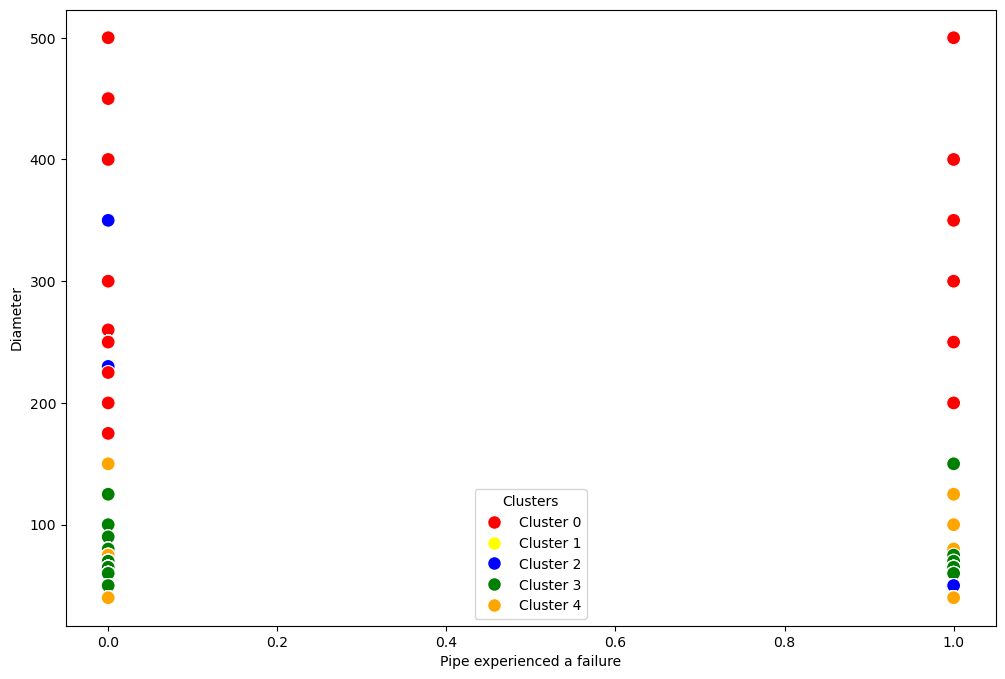

In [217]:
# Plot the clusters for the "failure_occurred_on_pipe" and "Diameter" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_original_with_clusters['failure_occurred_on_pipe'], y=df_original_with_clusters['diameter'], hue=df_original_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe experienced a failure')  # Label x-axis.
plt.ylabel('Diameter')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

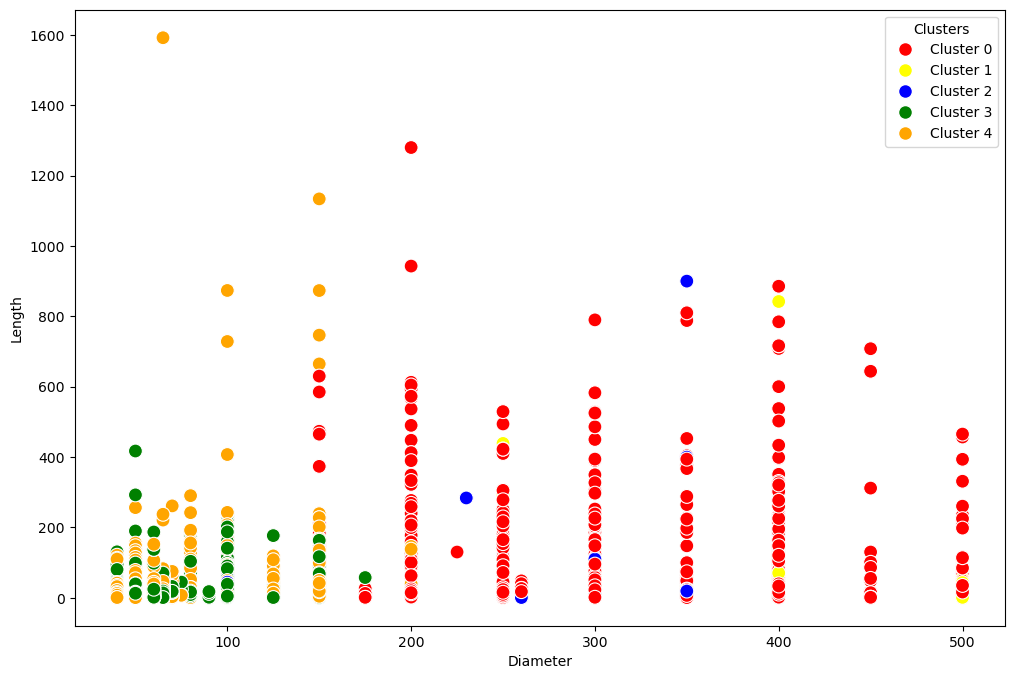

In [218]:
# Plot the clusters for the "Diameter" and "Length" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_original_with_clusters['diameter'], y=df_original_with_clusters['length'], hue=df_original_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Diameter')  # Label x-axis.
plt.ylabel('Length')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

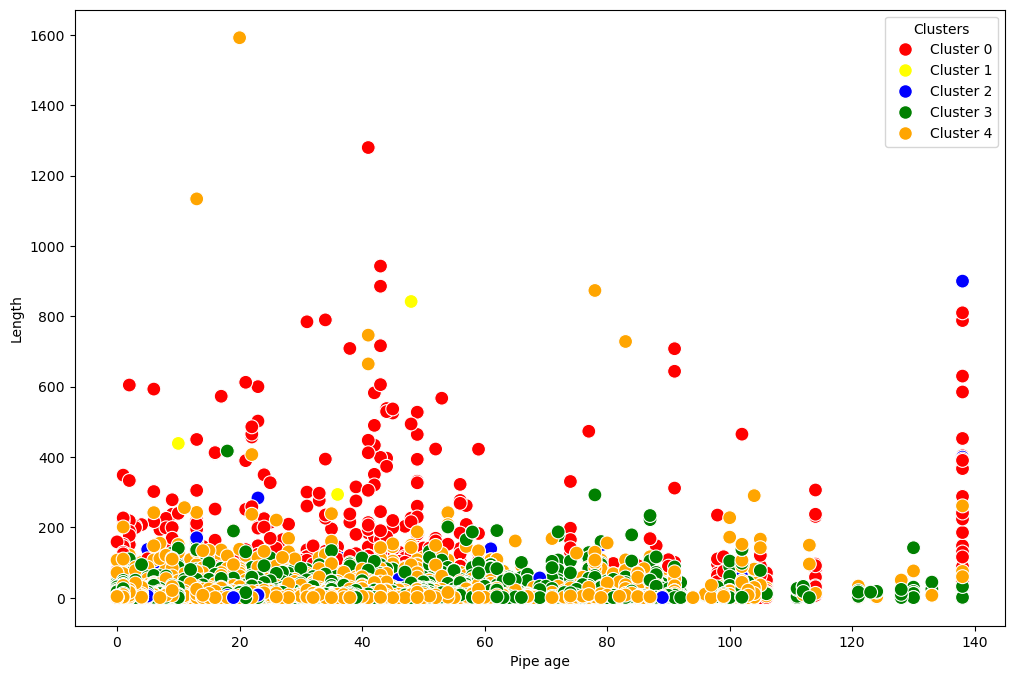

In [219]:
#Plot the clusters for the "Pipe Age" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_original_with_clusters['pipe_age_2013'], y=df_original_with_clusters['length'], hue=df_original_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe age')  # Label x-axis.
plt.ylabel('Length')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

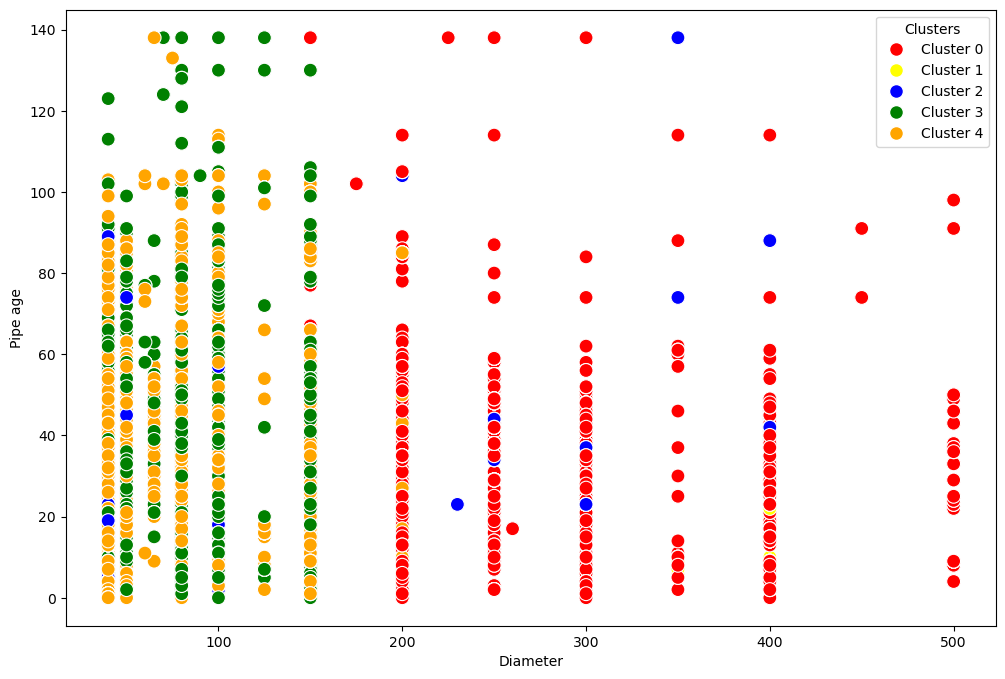

In [220]:
#Plot the clusters for the "Diameter" and "Pipe Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_original_with_clusters['diameter'], y=df_original_with_clusters['pipe_age_2013'], hue=df_original_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Diameter')  # Label x-axis.
plt.ylabel('Pipe age')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

#### b. Visualizations using the clustered standardized data

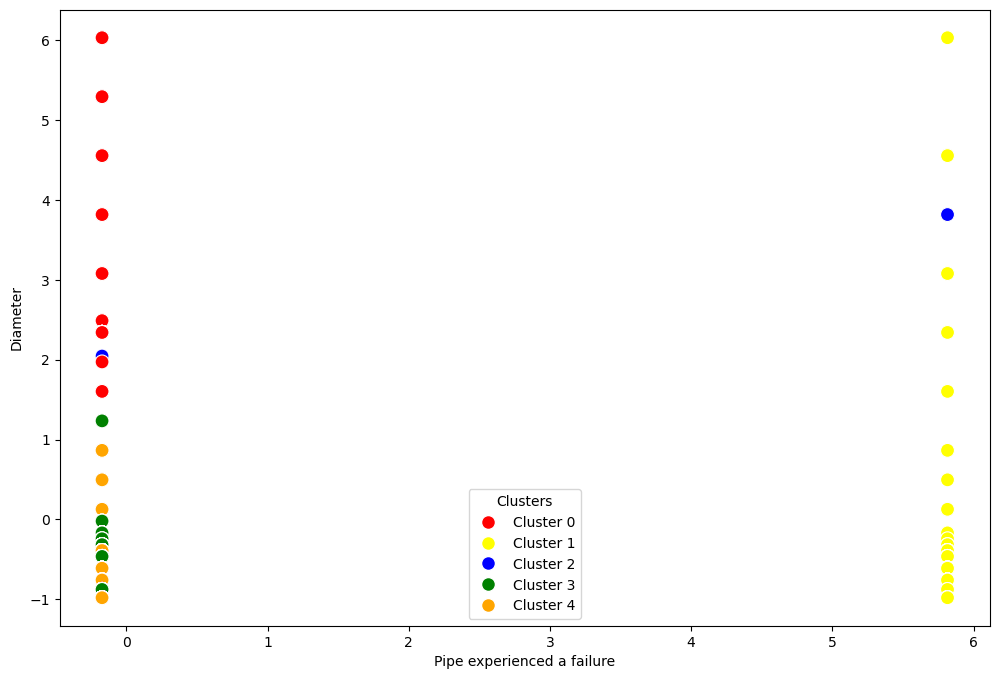

In [221]:
# Plot the clusters for the "failure_occurred_on_pipe" and "Diameter" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_with_clusters['failure_occurred_on_pipe'], y=df_with_clusters['diameter'], hue=df_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe experienced a failure')  # Label x-axis.
plt.ylabel('Diameter')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

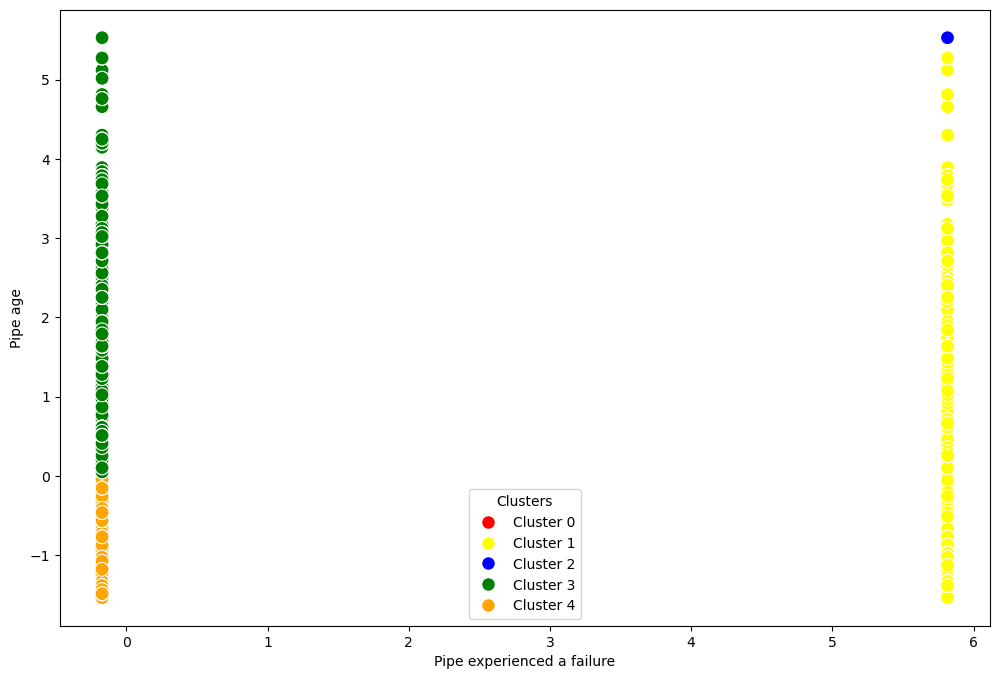

In [222]:
# Plot the clusters for the "failure_occurred_on_pipe" and "pipe_age" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_with_clusters['failure_occurred_on_pipe'], y=df_with_clusters['pipe_age_2013'], hue=df_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe experienced a failure')  # Label x-axis.
plt.ylabel('Pipe age')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.savefig('clusters_age_failure.png')
plt.show()

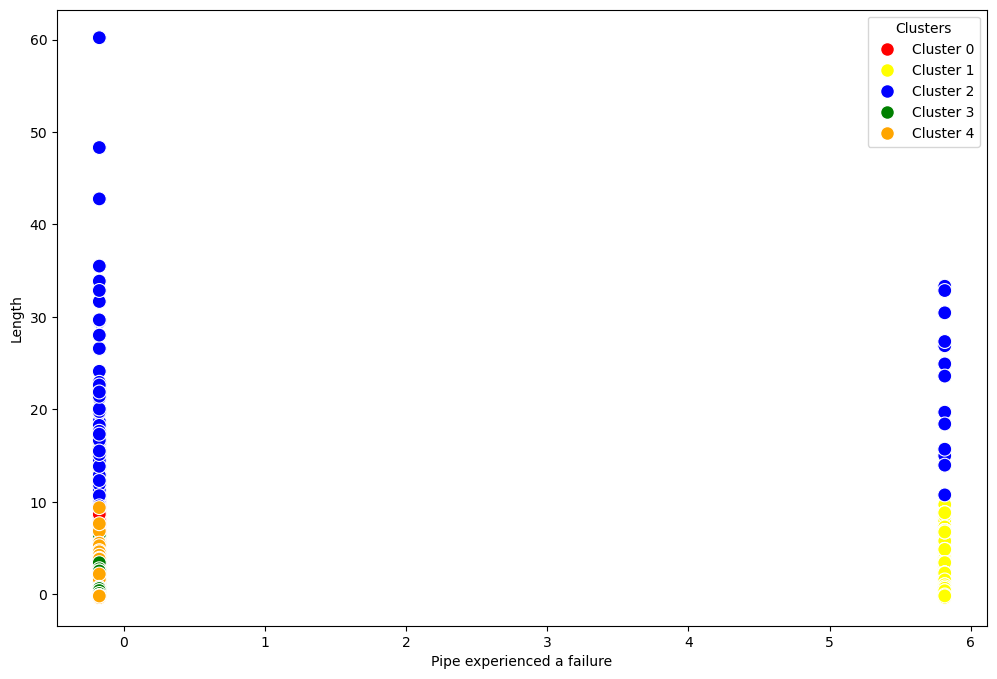

In [224]:
# Plot the clusters for the "failure_occurred_on_pipe" and "length" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_with_clusters['failure_occurred_on_pipe'], y=df_with_clusters['length'], hue=df_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe experienced a failure')  # Label x-axis.
plt.ylabel('Length')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

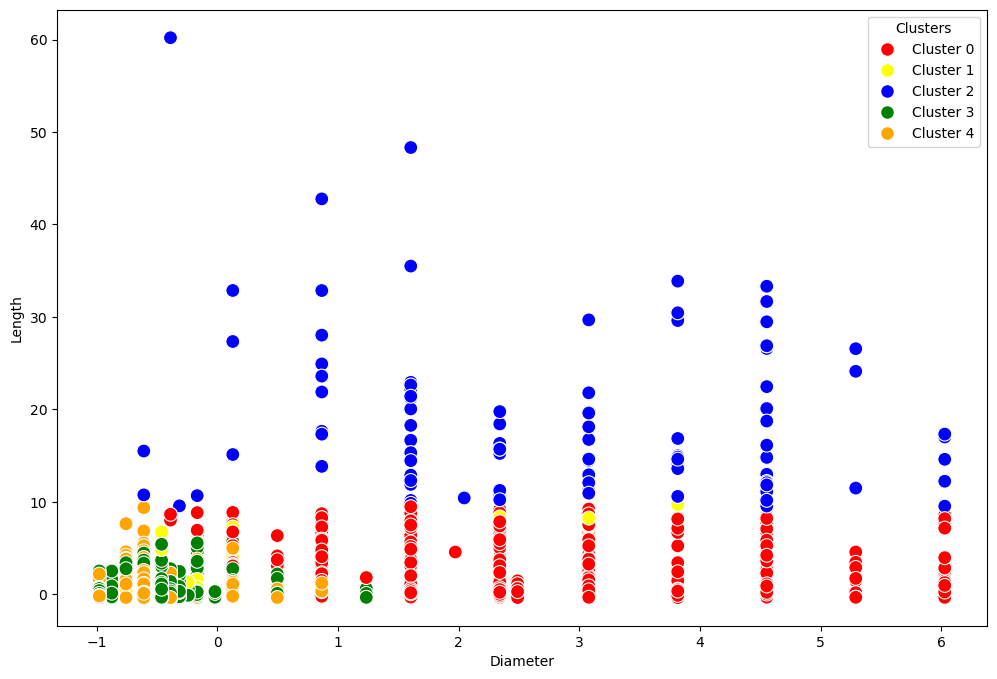

In [225]:
# Plot the clusters for the "Diameter" and "Length" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_with_clusters['diameter'], y=df_with_clusters['length'], hue=df_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Diameter')  # Label x-axis.
plt.ylabel('Length')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

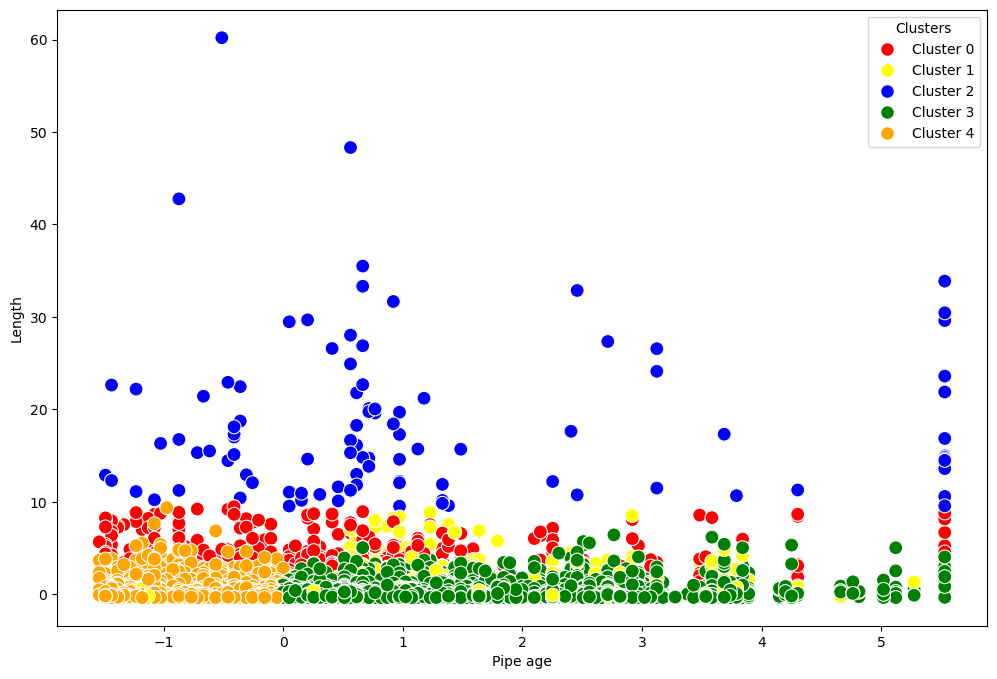

In [226]:
#Plot the clusters for the "Pipe Age" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_with_clusters['pipe_age_2013'], y=df_with_clusters['length'], hue=df_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe age')  # Label x-axis.
plt.ylabel('Length')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')

plt.show()

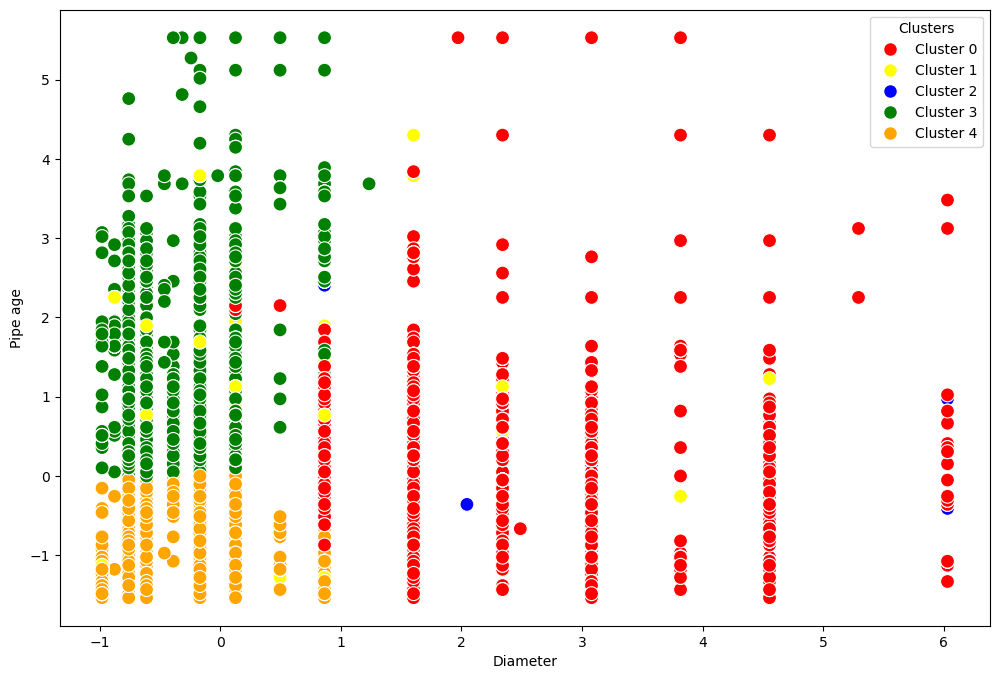

In [227]:
#Plot the clusters for the "Diameter" and "Pipe Age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_with_clusters['diameter'], y=df_with_clusters['pipe_age_2013'], hue=df_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Diameter')  # Label x-axis.
plt.ylabel('Pipe age')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.savefig('clusters_age_diameter')
plt.show()

#### Descriptive Statistics for the Clusters

In [229]:
df_with_clusters.loc[df_with_clusters['clusters'] == 4, 'cluster'] = 'orange'
df_with_clusters.loc[df_with_clusters['clusters'] == 3, 'cluster'] = 'green'
df_with_clusters.loc[df_with_clusters['clusters'] == 2, 'cluster'] = 'blue'
df_with_clusters.loc[df_with_clusters['clusters'] == 1, 'cluster'] = 'yellow'
df_with_clusters.loc[df_with_clusters['clusters'] == 0, 'cluster'] = 'red'

In [230]:
df_original_with_clusters.groupby('cluster').agg({'pipe_age_2013':['mean', 'median'], 
                         'diameter':['mean', 'median'], 
                         'length':['mean', 'median']})

pipe_age_2013           diameter            length           
                 mean median        mean median       mean     median
cluster                                                              
blue        39.666667   35.0  291.010101  300.0  40.711698  10.674547
green       29.434275   28.0   71.306354   50.0   8.600698   3.900000
orange      30.148294   29.0   66.261500   50.0   8.080156   3.818000
red         31.892639   34.0  201.300424  200.0  18.209492   6.641313
yellow      29.514691   29.0  113.404255  100.0  11.740140   4.964396

### Observation: The visualization effectively reveal the distribution of pipe age and diameter across clusters (clusters 3 and 4 primarily comprising smaller diameters, younger pipes, and middle-aged pipes, cluster 0 associated with medium to larger diameters including both young and middle-aged pipes, and cluster 2 characterized by older pipes, mostly with smaller to medium diameters), as well as other structural parameters such as pipe length - diameter or pipe age - pipe length. But it falls short in providing meaningful insights into the influencing factors, in this case structural parameters of pipes, on failure occurrence, because when I incorporate of the binary variable 'failure_occurred_on_pipe' it leads to the formation of a cluster group exclusively for pipes where failure is observed, thereby constraining the interpretability of other features.
### Given the characteristics of the data, it appears that traditional clustering algorithms may not be the most suitable technique for capturing meaningful relationships aligned with the project objectives. 

## 06. K-Means Clustering, Part 2 
### In this section, we utilize the dataset_all, which encompasses all variables in the model, including both numerical and categorical ones. This is feasible because the categorical variables are encoded as follows:

#### Soil_consistency: 1= very low cohesive, 2= low cohesive, 3= moderately cohesive, 4= highly cohesive, 5= very highly cohesive
#### Soil_aggressivity: 1= Ia (low), 2= Ib (low), 3= II (moderately), 4= III (highly)
#### Traffic_load: 1= none, 2= only passenger cars, 3= low (<100 trucks), 4= medium (up to 500 trucks), 5= high (up to 1000 trucks)
#### Stray_electricity: 1= 0 - 1 m, 2= 1 - 5 m, 3= 5 - 10 m, 4= more than 10 m
### Given the descriptive nature of these codes, employing one-hot encoding is considered unnecessary. Typically, one-hot encoding is employed to prevent the model from ascribing significance to the numerical value or order of the codes. However, in this instance, a higher code value corresponds to an unfavorable condition regarding the environmental impact on pipe occurrences.

###  Data prep for the analysis

In [231]:
selected_columns_1 = ['pipe_age_2013', 'length', 'diameter', 'material',
       'soil_consistency', 'soil_aggressivity', 'traffic_load',
       'stray_electricity', 'failure_occurred_on_pipe']

In [232]:
df_all = df_pipelines_failure[selected_columns_1]

In [233]:
# Missing values
df_all.isnull().sum()

pipe_age_2013               5493
length                         0
diameter                     142
material                       0
soil_consistency               0
soil_aggressivity              0
traffic_load                   0
stray_electricity              0
failure_occurred_on_pipe       0
dtype: int64

In [234]:
# Drop rows with missing values
df_no_nan = df_all.dropna()

# Display the resulting DataFrame
print(df_no_nan)

       pipe_age_2013     length  diameter  material  soil_consistency  \
12              36.0   0.850000     500.0         3                 0   
14               9.0   2.503001     500.0         3                 4   
15              36.0   5.169915     500.0         3                 0   
16              24.0  64.949526     500.0         3                 4   
17              50.0  10.940000     500.0         2                 5   
...              ...        ...       ...       ...               ...   
79199            3.0   1.600000      25.0         8                 1   
79200            2.0   6.342000      25.0         8                 1   
79201            7.0   0.286000      25.0         8                 1   
79202            1.0   4.328000      25.0         8                 3   
79203            1.0   4.938000      25.0         8                 1   

       soil_aggressivity  traffic_load  stray_electricity  \
12                     4             2                  4   
1

In [235]:
df_no_nan.columns

Index(['pipe_age_2013', 'length', 'diameter', 'material', 'soil_consistency',
       'soil_aggressivity', 'traffic_load', 'stray_electricity',
       'failure_occurred_on_pipe'],
      dtype='object')

#### Note: 
#### Given that the categorical variables are encoded as follows:

#### Soil_consistency: 1= very low cohesive, 2= low cohesive, 3= moderately cohesive, 4= highly cohesive, 5= very highly cohesive
#### Soil_aggressivity: 1= Ia (low), 2= Ib (low), 3= II (moderately), 4= III (highly)
#### Traffic_load: 1= none, 2= only passenger cars, 3= low (<100 trucks), 4= medium (up to 500 trucks), 5= high (up to 1000 trucks)
#### Stray_electricity: 1= 0 - 1 m, 2= 1 - 5 m, 3= 5 - 10 m, 4= more than 10 m

#### Considering the descriptive nature of the provided codes, employing one-hot encoding is deemed unnecessary. Typically, one-hot encoding is utilized to prevent the model from attributing significance to the numerical value or order of the codes. However, in this instance, a higher code value corresponds to an unfavorable condition regarding the environmental impact on pipe occurrences.

In [236]:
# Standardize the data
df_scaler_all = StandardScaler().fit_transform(df_no_nan)

In [237]:
df_scaler_all

array([[ 0.30610695, -0.3491876 ,  6.02964393, ...,  0.41261197,
         0.60042437, -0.17195669],
       [-1.07665185, -0.2862935 ,  6.02964393, ..., -0.86535993,
         0.60042437, -0.17195669],
       [ 0.30610695, -0.18482156,  6.02964393, ..., -0.86535993,
         0.60042437, -0.17195669],
       ...,
       [-1.17907843, -0.37064692, -0.9798436 , ...,  0.41261197,
         0.60042437, -0.17195669],
       [-1.48635817, -0.21685513, -0.9798436 , ..., -0.86535993,
        -2.23302512, -0.17195669],
       [-1.48635817, -0.19364558, -0.9798436 , ..., -0.86535993,
         0.60042437, -0.17195669]])

### The Elbow Technique

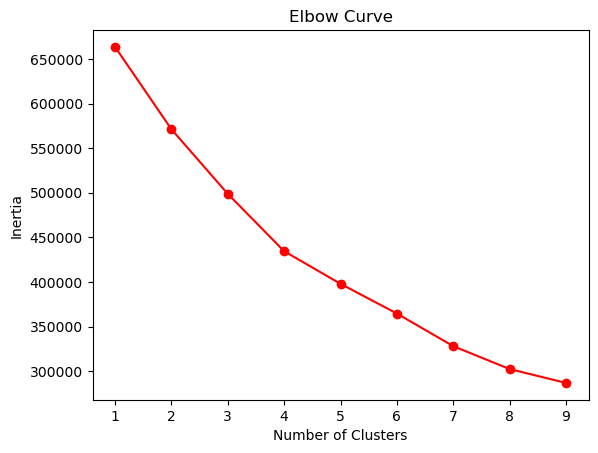

In [238]:
# Define the range of potential clusters in the data
k_values = range(1, 10)

# Initialize an empty list to store the inertia for each k
inertia_values = []

# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(df_scaler_all)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Observation:   In this instance, the optimal number of clusters appears to be 4.

### Create the k-means object

In [239]:
# Create the k-means object.
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# Fit the k-means object to the data.
kmeans.fit(df_scaler_all)

KMeans(n_clusters=4, n_init=10, random_state=42)

#### Attach a new column and create a new dataframe 'df_all_with_clusters' with the resulting clusters, that  allows  creating a visualization using the clusters

In [240]:
# Convert the cluster labels into a DataFrame
cluster_labels_all = kmeans.fit_predict(df_scaler_all)
cluster_df_all = pd.DataFrame(cluster_labels_all, columns=['clusters'])
# Concatenate the cluster labels with your original data
df_all_with_clusters = pd.concat([pd.DataFrame(df_scaler_all), cluster_df_all], axis=1)

In [241]:
# Assuming df_scaler_all is a NumPy array
df_scaler_all = pd.DataFrame(df_no_nan)  # Convert to Pandas DataFrame

# Get back the original columns names
df_all_with_clusters.columns = df_no_nan.columns.tolist() + ['clusters']

# Display the head of the DataFrame
print(df_all_with_clusters.head())

   pipe_age_2013    length  diameter  material  soil_consistency  \
0       0.306107 -0.349188  6.029644 -0.768860         -1.097865   
1      -1.076652 -0.286294  6.029644 -0.768860          1.207123   
2       0.306107 -0.184822  6.029644 -0.768860         -1.097865   
3      -0.308453  2.089699  6.029644 -0.768860          1.207123   
4       1.023093  0.034721  6.029644 -1.257915          1.783370   

   soil_aggressivity  traffic_load  stray_electricity  \
0           1.312371      0.412612           0.600424   
1          -0.267958     -0.865360           0.600424   
2           1.312371     -0.865360           0.600424   
3           0.522206     -0.865360           0.600424   
4           0.522206     -0.865360          -2.233025   

   failure_occurred_on_pipe  clusters  
0                 -0.171957         3  
1                 -0.171957         3  
2                 -0.171957         3  
3                 -0.171957         3  
4                 -0.171957         3  


In [242]:
df_all_with_clusters['clusters'].value_counts()

3    28386
1    24202
0    18951
2     2173
Name: clusters, dtype: int64

###  Visualization of the clusters

In [243]:
# Define a dictionary mapping cluster numbers to color names
cluster_color_mapping = {
    0: 'red',
    1: 'yellow',
    2: 'blue',
    3: 'green',
}

In [244]:
# Use the map function to apply color names based on the 'clusters' column
df_all_with_clusters['cluster'] = df_all_with_clusters['clusters'].map(cluster_color_mapping)

In [245]:
# Set the color palette
sns.set_palette(list(cluster_color_mapping.values()))

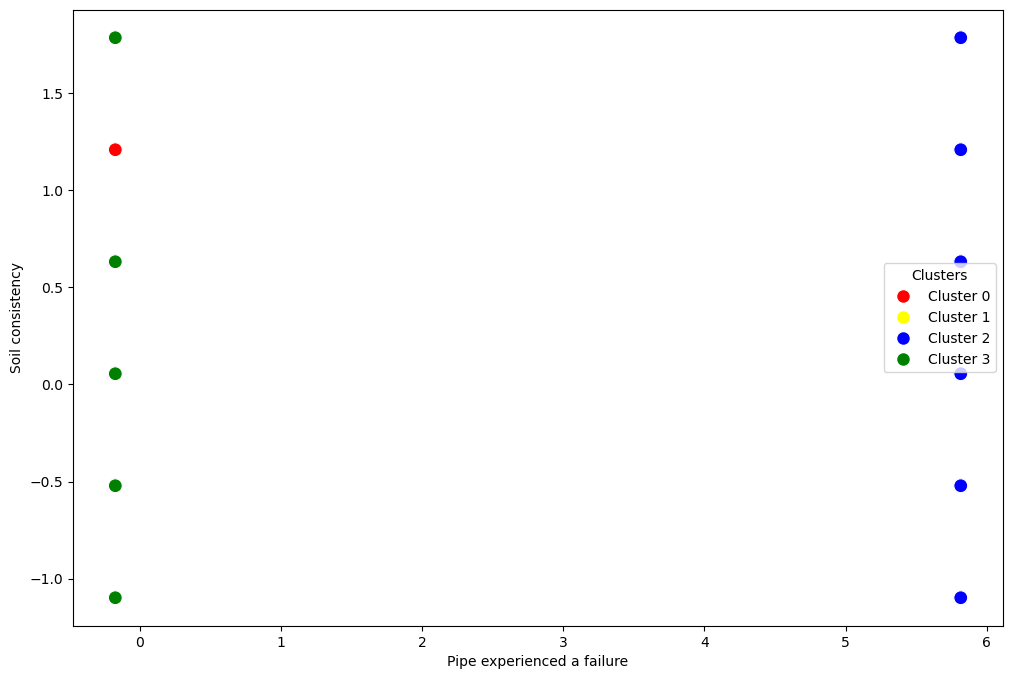

In [246]:
# Plot the clusters for the "failure_occurred_on_pipe" and "soil_consistency" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all_with_clusters['failure_occurred_on_pipe'], y=df_all_with_clusters['soil_consistency'], hue=df_all_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe experienced a failure')  # Label x-axis.
plt.ylabel('Soil consistency')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.savefig('clusters_soil_cons_failure')
plt.show()

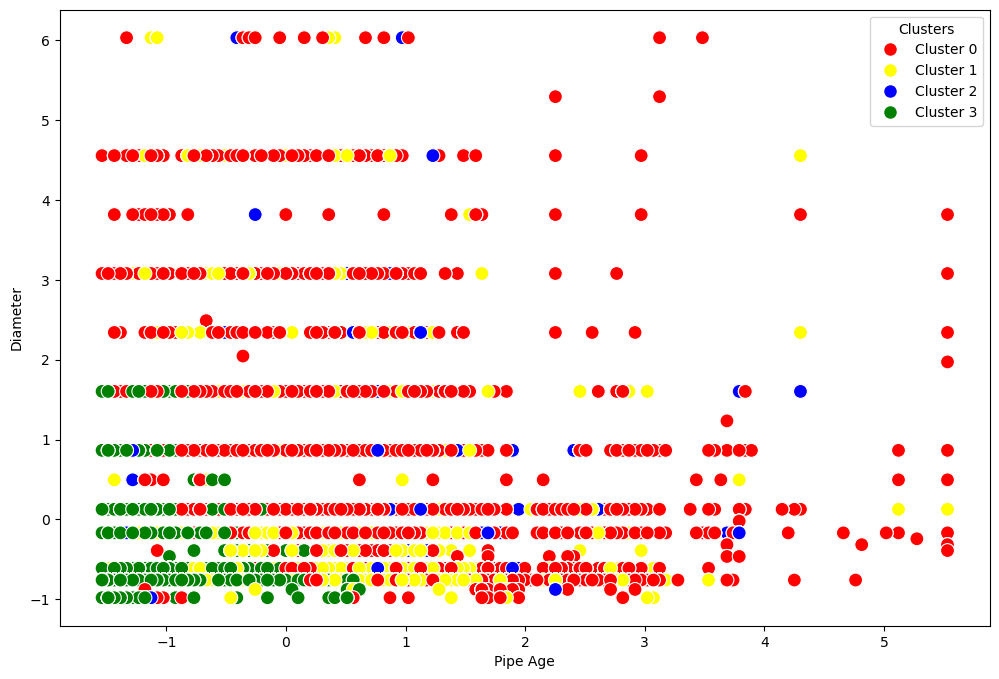

In [248]:
# Plot the clusters for the "Pipe Age" and "Diameter" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_all_with_clusters['pipe_age_2013'], y=df_all_with_clusters['diameter'], hue=df_all_with_clusters['cluster'], s=100) 

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Pipe Age')  # Label x-axis.
plt.ylabel('Diameter')  # Label y-axis.

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in cluster_color_mapping.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cluster_color_mapping.values()]

plt.legend(legend_handles, legend_labels, title='Clusters')
plt.show()

In [249]:
df_with_clusters.loc[df_with_clusters['clusters'] == 3, 'cluster'] = 'green'
df_with_clusters.loc[df_with_clusters['clusters'] == 2, 'cluster'] = 'blue'
df_with_clusters.loc[df_with_clusters['clusters'] == 1, 'cluster'] = 'yellow'
df_with_clusters.loc[df_with_clusters['clusters'] == 0, 'cluster'] = 'red'

In [250]:
df_all_with_clusters.groupby('clusters').agg({
    'pipe_age_2013': ['mean', 'median'], 
    'length': ['mean', 'median'], 
    'diameter': ['mean', 'median'], 
    'soil_consistency': ['mean', 'median'],
    'soil_aggressivity': ['mean', 'median'],
    'traffic_load': ['mean', 'median'],
    'stray_electricity': ['mean', 'median'],
    'failure_occurred_on_pipe': 'mean'
})

pipe_age_2013              length            diameter            \
                  mean    median      mean    median      mean    median   
clusters                                                                   
0             0.102848  0.203680 -0.184964 -0.336175 -0.176488 -0.610923   
1            -0.748281 -0.871799 -0.056647 -0.198059 -0.412880 -0.758491   
2             0.681027  0.664600  1.381546  0.249736  0.356752  0.126918   
3             0.517190  0.408534  0.066023 -0.148242  0.442540  0.126918   

         soil_consistency           soil_aggressivity           traffic_load  \
                     mean    median              mean    median         mean   
clusters                                                                       
0               -0.214900 -0.521618          0.349505  0.522206     0.965516   
1                0.194679 -0.521618         -0.273835 -1.058123    -0.104501   
2                0.046939 -0.521618          0.009854  0.522206    -0.114926   
3               -0.026106 -0.521618         -0.000617  0.522206    -0.546700   

                   stray_electricity           failure_occurred_on_pipe  
            median              mean    median                     mean  
clusters                                                                 
0         0.412612         -1.305836 -1.288542                -0.171957  
1         0.412612          0.413768  0.600424                -0.171957  
2        -0.865360          0.116665  0.600424                 5.661118  
3        -0.865360          0.510089  0.600424                -0.171957

### Observation: In the second part of the K-Means Clustering, I included all variables in the model. However, I would like to reiterate my initial conclusion that, given the nature of the data, clustering algorithms may not be the most suitable technique for capturing meaningful relationships aligned with the project objectives in identifying influencing factors on pipe failure occurrence. 
### Nevertheless in the Part 2 of the 6.5 Unsupervised Machine Learning Clustering Scripts, I will employ Agglomerative Clustering below to investigate alternative clustering structures and extract additional insights from the data.